In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import np_utils

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = dataset.iloc[:, 3:-1].values
Y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((242, 10), (242,), (61, 10), (61,))

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
duplicated_features = dataset[dataset.duplicated()].index.values
print(duplicated_features)

[164]


In [ ]:
unique_df = dataset.drop_duplicates(keep='first').T
unique_df.shape

(14, 302)

In [ ]:
removed_features = [col for col in dataset.columns if col not in unique_df.columns]
removed_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)
feature_selector.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
sum(feature_selector.get_support())

10

In [ ]:
X_train = feature_selector.transform(X_train)
X_test = feature_selector.transform(X_test)
X_train.shape, X_test.shape

((212, 10), (91, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, Y, epochs=60, batch_size=32)

Epoch 1/60
10/10 [==============================] - 0s 2ms/step - loss: 31.6349 - accuracy: 0.5446
Epoch 2/60
10/10 [==============================] - 0s 2ms/step - loss: 23.8775 - accuracy: 0.5446
Epoch 3/60
10/10 [==============================] - 0s 2ms/step - loss: 16.4181 - accuracy: 0.5446
Epoch 4/60
10/10 [==============================] - 0s 2ms/step - loss: 9.7032 - accuracy: 0.5446
Epoch 5/60
10/10 [==============================] - 0s 2ms/step - loss: 3.9450 - accuracy: 0.5083
Epoch 6/60
10/10 [==============================] - 0s 2ms/step - loss: 1.8618 - accuracy: 0.3696
Epoch 7/60
10/10 [==============================] - 0s 2ms/step - loss: 1.5835 - accuracy: 0.3927
Epoch 8/60
10/10 [==============================] - 0s 2ms/step - loss: 1.3731 - accuracy: 0.4290
Epoch 9/60
10/10 [==============================] - 0s 2ms/step - loss: 1.3074 - accuracy: 0.3762
Epoch 10/60
10/10 [==============================] - 0s 2ms/step - loss: 1.2640 - accuracy: 0.3762
Epoch 11/60
10/1

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

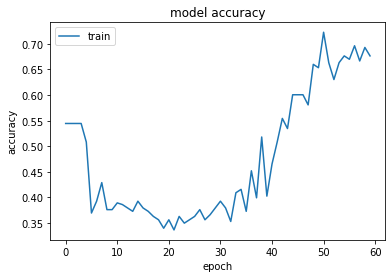

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

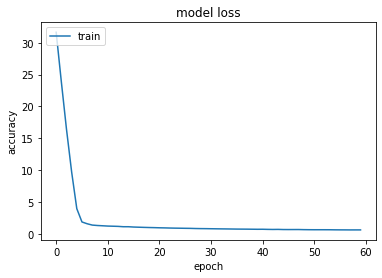

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
predictions = (model.predict(X) > 0.5).astype(int)
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0] => 0 (expected 1)
[130.0, 250.0, 0.0, 1.0, 187.0, 0.0, 3.5, 0.0, 0.0, 2.0] => 1 (expected 1)
[130.0, 204.0, 0.0, 0.0, 172.0, 0.0, 1.4, 2.0, 0.0, 2.0] => 1 (expected 1)
[120.0, 236.0, 0.0, 1.0, 178.0, 0.0, 0.8, 2.0, 0.0, 2.0] => 1 (expected 1)
[120.0, 354.0, 0.0, 1.0, 163.0, 1.0, 0.6, 2.0, 0.0, 2.0] => 0 (expected 1)


In [ ]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

10/10 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6832
Accuracy: 68.32


In [ ]:
y_pred = model.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[22  5]
 [12 22]]


0.7213114754098361

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
conf_misclassification = 1- conf_accuracy
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))
conf_precision = (TN / float(TN + FP))
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 22
True Negatives: 22
False Positives: 5
False Negatives: 12
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.65
Specificity: 0.81
Precision: 0.81
f_1 Score: 0.72
